In [28]:
import argparse
import glob
import numpy as np
import os 
from tqdm import tqdm
import matplotlib.pyplot as plt
from tabulate import tabulate
def calc_min_max(x):
    # x = (x.astype(np.float32)/127.5-1)
    return np.nanmin(x,axis=1),np.nanmax(x,axis=1)
def create_plots(x,y):
    n=4
    x *= 200
    y *= 200
    fig,axes = plt.subplots(2,n,figsize=(10,5),tight_layout=True)
    for i in range(n):
        axes[0,i].plot(x[i,:])
        axes[1,i].plot(y[i,:])
    plt.show()
    plt.close()
def load_npys(fpath=r'../data/processed/list/test_BP.txt',data_root=r'../data/processed/BP_npy/1121/p00'):
    data = []
    with open(fpath,mode='r') as flist:
        for f in flist.read().splitlines():
            arr = np.load(data_root+"/"+str(f))
            if len(arr) != 0:
                data.append(arr)
    data = np.concatenate(data,dtype=np.float16)
    return data
# if __name__ == '__main__':
#     parser = argparse.ArgumentParser()
#     # parser.add_argument('-s', '--src', type=str, help='Ground truth images directory')
#     parser.add_argument('-d', '--dst', type=str, help='Generate images directory')
   
#     ''' parser configs '''
#     args = parser.parse_args()

    

In [223]:
# DATA_PATH = r"..\repos\latent-diffusion\predictions\ppg2abp_1208\samples\00665764\2023-12-12-18-32-40\numpy\255-256x1x256-samples.npz"
DATA_PATH = r"..\repos\latent-diffusion\predictions\2023-12-12-21-13-18"


In [198]:
# p0n_dir = glob.glob("p*",root_dir=args.dst)
n_patients = 0
errors = []
gt = []
cond= []
out = []



In [133]:
# # for i in p0n_dir:
# gt_files = glob.glob(f"{args.dst}\GT_*.npy")
# cond_files = glob.glob(f"{args.dst}\Process_*.npy")
# out_files = glob.glob(f"{args.dst}\OUT_*.npy")
# for j in tqdm(range(len(gt_files))):
# # output = np.load(os.path.join(file,args.dst))
#     gt.append(np.load(os.path.join(gt_files[j])))
#     # plt.plot(gt[0,:])
#     # plt.show()
#     cond.append(np.load(os.path.join(cond_files[j])))
#     out.append(np.load(os.path.join(out_files[j])))
# # print(gt.shape,out.shape,gt.dtype)
# # calc min and max"
# if j % 50 == 0:
#     # create_plots(gt,out)
#     pass
# print(gt[-1].shape)

In [212]:
a = np.load(DATA_PATH)
print(a.files)
a0 = a['arr_0']
# a1 = a['arr_1']
a0.shape,a1.shape

PermissionError: [Errno 13] Permission denied: '..\\repos\\latent-diffusion\\predictions\\2023-12-12-20-54-08'

In [213]:
l = load_npys()
gt = a1[:len(a0)].squeeze().transpose()
cond = l[:len(a0),:,1].transpose()
out = a0[:len(a0)].squeeze().transpose()
gt.shape,cond.shape,out.shape

((256, 256), (256, 256), (256, 256))

In [224]:
n = 128
gt = np.load(os.path.join(DATA_PATH,f"GT-{n}.npy")).squeeze()
cond = np.load(os.path.join(DATA_PATH,f"Cond-{n}.npy")).squeeze()
out = np.load(os.path.join(DATA_PATH,f"Out-{n}.npy")).squeeze()
gt.shape,cond.shape,out.shape

((128, 256), (128, 256), (128, 256))

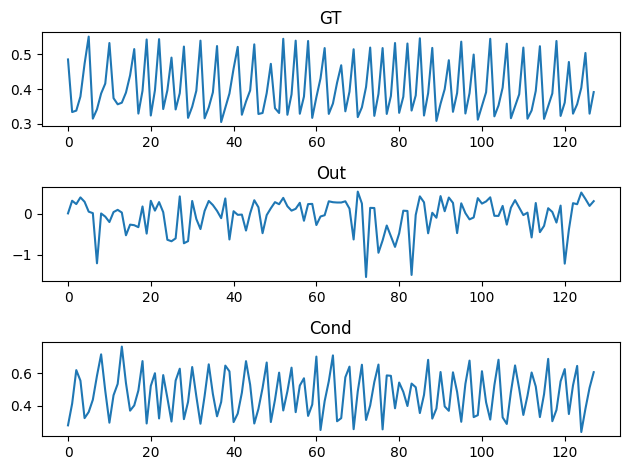

In [226]:
i = 44
fig,axes = plt.subplots(3,1)
axes[0].plot(gt[:,i])
axes[0].set_title("GT")
axes[1].plot(out[:,i])
axes[1].set_title("Out")
axes[2].plot(cond[:,i])
axes[2].set_title("Cond")
fig.tight_layout()

In [192]:
# gt = np.concatenate(gt,axis=0)
# out = np.concatenate(out,axis=0)
# cond = np.concatenate(cond,axis=0)
gt_mean = np.mean(gt.flatten())
out_mean = np.mean(out.flatten())
cond_mean = np.mean(cond.flatten())
gt_std = np.std(gt.mean(axis=1),dtype=np.float64)
out_std = np.std(out.mean(axis=1),dtype=np.float64)
cond_std = np.std(cond.mean(axis=1),dtype=np.float64)
print(np.count_nonzero(np.isnan(out)))
headers = ["Signal", "Mean","Std"]
table = [["data_ppg", 0.494153162946643,0.10694360087091538],
    ]
table.append(["cond_ppg",cond_mean,cond_std])
table.append( ["data_abp",0.39593121533751857,0.13489903083932583])
table.append(["gt",gt_mean,gt_std])
table.append(["out",out_mean,out_std])
print(tabulate(table,headers, floatfmt=".4f"))
# print(gt_mean,gt_std,out_mean,out_std,cond_mean,cond_std)
# print(gt.shape,out.shape)
# out = (out-out_mean)/out_std*0.1349+0.396
# out = (out-out_mean)/out_std*gt_std+gt_mean
gt_min,gt_max = calc_min_max(gt)
out_min,out_max = calc_min_max(out)
# print(out_max.shape,out_max[:10])
errors = np.zeros((2,*out_min.shape))
# print(error.shape)
errors[0,:]=gt_min-out_min
errors[1,:]=gt_max-out_max
# errors = np.concatenate(errors,axis=1)

errors*=200
errors = errors[:,~np.isnan(errors).any(axis=0)]
print(np.count_nonzero(np.isnan(errors)))
print("error shape:",errors.shape)
n_samples = errors.shape[1]
print("n_samples:",n_samples)
me = np.mean(errors,axis=1)
mae = np.mean(np.abs(errors),axis=1)
rmse = np.sqrt(np.mean(errors**2,axis=1))
std = np.std(errors,axis=1)
print(me.shape,mae.shape,rmse.shape,std.shape)
error_5 = np.count_nonzero(np.abs(errors)<=5,axis=1)/n_samples*100
# print(n_samples,np.count_nonzero(np.abs(errors)<=5,axis=1),np.count_nonzero(errors<=10,axis=1),np.count_nonzero(errors<=15,axis=1))
error_10 = np.count_nonzero(np.abs(errors)<=10,axis=1)/n_samples*100
error_15 = np.count_nonzero(np.abs(errors)<=15,axis=1)/n_samples*100
# print(me,mae,rmse,std)
# plt.subplot(2,1,1)
# plt.hist(errors[0],bins=30)
# plt.xlim(-60,60)
# plt.subplot(2,1,2)
# plt.hist(errors[1],bins=30)
# plt.xlim(-60,60)
# plt.show()
print("""
    test data samples:
    # samples : {}
    
    Eval Stats:   SBP    DBP
    MAE:        {:6.3f} {:6.3f}
    RMSE:       {:6.3f} {:6.3f}
    Mean Error: {:6.3f} {:6.3f}
    STD:        {:6.3f} {:6.3f}
    
    BHS standards range:
    Error   <5mmHg <10mmHg <15mmHg
    gradeA     80%     90%     95%
    gradeB     65%     85%     95%
    gradeC     45%     75%     90%
    SBP     {:5.1f}%  {:5.1f}%  {:5.1f}%
    DBP     {:5.1f}%  {:5.1f}%  {:5.1f}%
    
    
    """.format(
    n_samples,
    *mae,
    *rmse,
    *me,
    *std,
    error_5[0], error_10[0], error_15[0],
    error_5[1], error_10[1], error_15[1],
    ))

0
Signal      Mean     Std
--------  ------  ------
data_ppg  0.4942  0.1069
cond_ppg  0.4407  0.0045
data_abp  0.3959  0.1349
gt        0.3983  0.0016
out       0.4416  0.0213
0
error shape: (2, 256)
n_samples: 256
(2,) (2,) (2,) (2,)

    test data samples:
    # samples : 256
    
    Eval Stats:   SBP    DBP
    MAE:        169.313 111.121
    RMSE:       222.839 116.271
    Mean Error: 169.313 -111.121
    STD:        144.879 34.223
    
    BHS standards range:
    Error   <5mmHg <10mmHg <15mmHg
    gradeA     80%     90%     95%
    gradeB     65%     85%     95%
    gradeC     45%     75%     90%
    SBP       0.0%    0.0%    0.0%
    DBP       0.0%    0.0%    0.0%
    
    
    
